In [1]:
import os
import fastai
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
from PIL import Image
import gc

In [2]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo2Oversampling/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=9, seed=43)

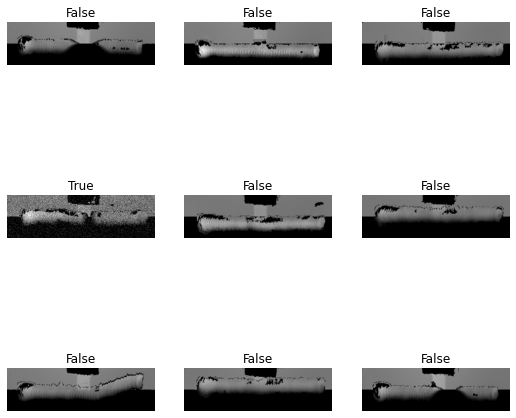

In [3]:
dls.show_batch()

In [4]:
precision = Precision()
f1 = F1Score()

In [5]:
learn = Learner(dls, densenet121(pretrained = True), opt_func = SGD,
              metrics=[accuracy,precision,f1])

SuggestedLRs(lr_min=0.003981071710586548, lr_steep=0.004365158267319202)

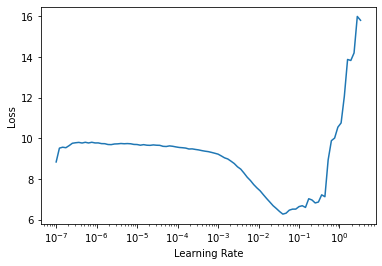

In [6]:
learn.lr_find()

In [7]:
learn.fit(3,lr=1e-2)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.148052,0.023313,0.991367,1.000000,0.971831,00:44
1,0.075187,0.037015,0.989928,0.939914,0.969027,00:42
2,0.020780,0.004736,0.997842,0.986486,0.993197,00:43


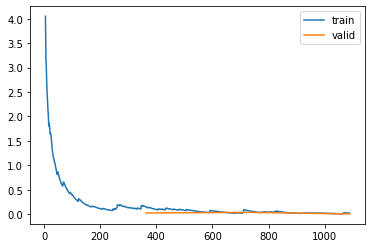

In [8]:
learn.recorder.plot_loss()

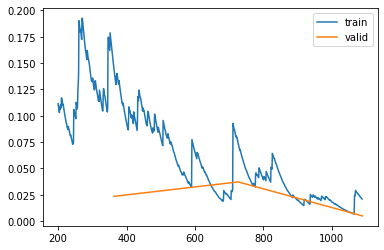

In [9]:
learn.recorder.plot_loss(skip_start=200)

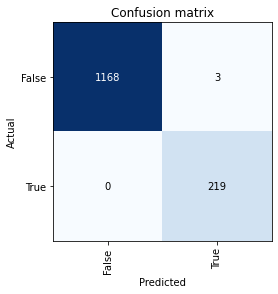

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [15]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.043242,0.018314,0.995714,0.994302,0.995720,01:21
1,0.027502,0.018205,0.995000,0.992888,0.995011,01:21


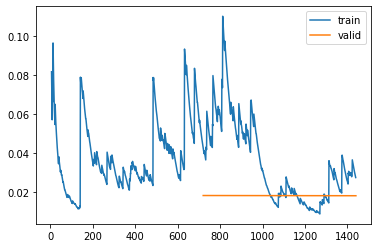

In [18]:
learn.recorder.plot_loss()